#### Tips of using this notebook:

- Try to solve the problem yourself first with the help of ChatGPT.
- Then check the reference code and the example prompt. The example prompt will be given in the slides.
- Always check the reliability of the generated answers and be responsible for them.

# Exercise 1: Classification tree

Dataset: the iris dataset

- The iris dataset is a well-known dataset in the field of machine learning and data science.
- It contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (setosa, virginica and versicolor)
- It is available in the package Scikit-learn and can be used straight away.

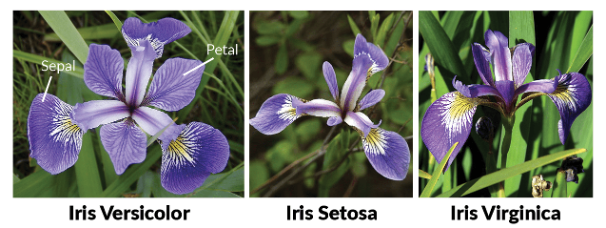

Tasks:
- Task 1: Load the iris dataset and print a few lines of it.
- Task 2: Build a decision tree classifier
- Task 3: Visualize the tree and the decision boundary

Your answer here (the prompt and the code):

**Task 1**

**Task 2**

**Task 3**

Reference code (Check the sildes for example prompt):

**Task 1**

In [1]:
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Print 10 random instances
print(df.sample(10))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
98                 5.1               2.5                3.0               1.1   
104                6.5               3.0                5.8               2.2   
143                6.8               3.2                5.9               2.3   
41                 4.5               2.3                1.3               0.3   
83                 6.0               2.7                5.1               1.6   
136                6.3               3.4                5.6               2.4   
97                 6.2               2.9                4.3               1.3   
49                 5.0               3.3                1.4               0.2   
48                 5.3               3.7                1.5               0.2   

     target  
100       2  
98        1  
104       2  
143       2  
41        0  
83        1  
136       

**Task 2**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Select petal length and petal width to create a sub-dataset
sub_df = df[['petal length (cm)', 'petal width (cm)']]

# Split the sub-dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sub_df, df['target'], test_size=0.2, random_state=42)

# Build a Decision Tree Classifier with the training set
classifier = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=10)
classifier.fit(X_train, y_train)

# Predict the instances in the testing set
predictions = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)#### Task 2

Accuracy: 1.0


**Task 3**

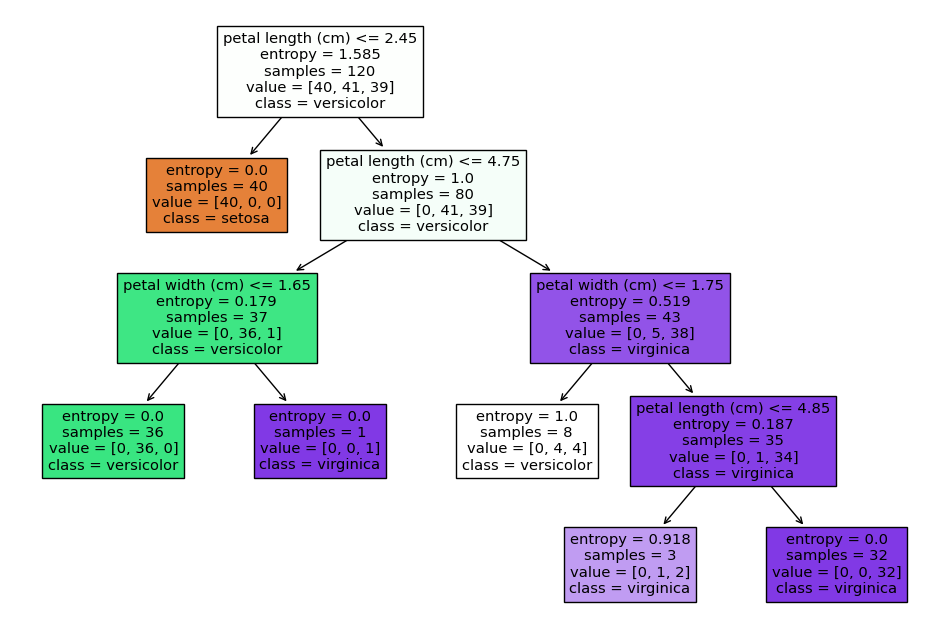

/Users/xiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


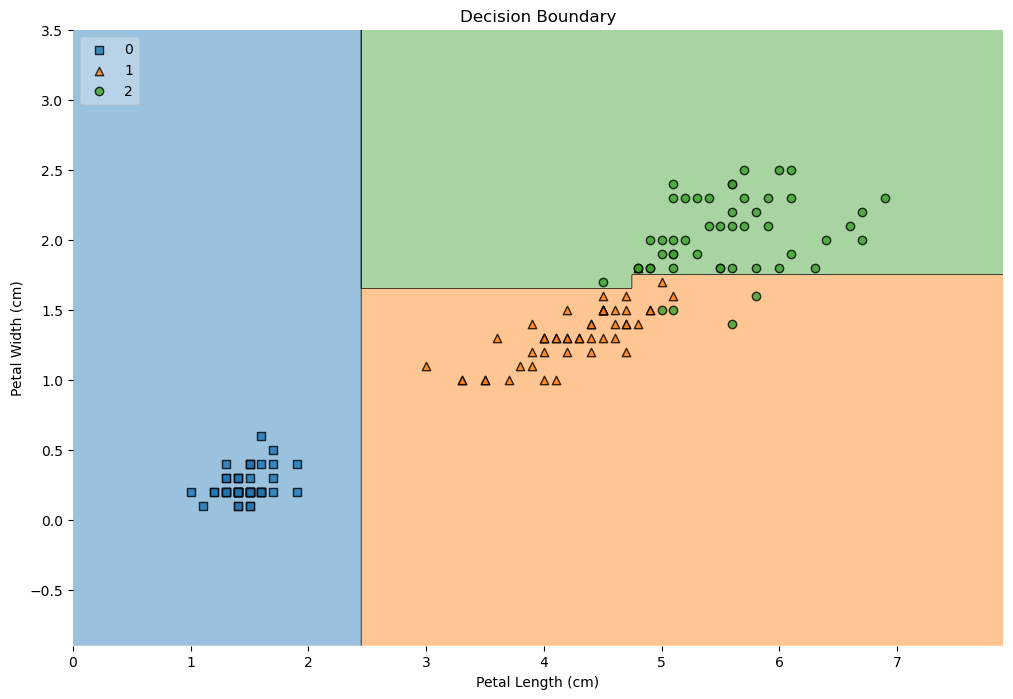

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions


# Visualize the tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(classifier, feature_names=sub_df.columns, class_names=iris.target_names, filled=True, ax=ax)
plt.show()

# Prepare the data for visualization of the decision boundary
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Visualize the decision boundary
fig, ax = plt.subplots(figsize=(12, 8))
plot_decision_regions(X_combined.values, y_combined.values, clf=classifier, legend=2, ax=ax)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary')
plt.show()

# Exercise 2: Regression tree

Dataset: Possum Regression dataset
- Used to predict the age of a possum
- Sex, age, and nine morphometric measurements of 104 data samples
- Download it from Blackboard to your PC

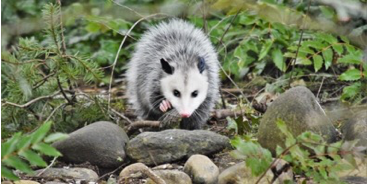

Tasks:
- Task 1: Design the whole process of solving this problem.
- Task 2: Follow the process to deal with the data and implement the regression tree with scikit-learn.
- Task 3: Try to improve the performance of your regression tree.


Your answer here (the prompt and the code):

**Task 1**

**Task 2**

**Task 3**

Reference code (Check the sildes for example prompt):

**Task 2**

Load the data

In [4]:
import pandas as pd

# Load the Possum Regression dataset from the CSV file
df = pd.read_csv('/Users/xiao/Desktop/possum_regression.csv')

# Print the headers and corresponding data types
print(df.dtypes)

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object


Clean the data

In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

Select the target variable and input features

In [6]:
from sklearn.model_selection import train_test_split

# Select target variable and input features
target_variable = 'age'
input_features = ["hdlngth", "skullw", "totlngth", "taill", "footlgth", "earconch", "eye", "chest", "belly"]

# Subset the DataFrame with the selected features
df = df[[target_variable] + input_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[input_features], df[target_variable], test_size=0.2, random_state=42)

Implement the regression tree

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Build the Regression tree
reg_tree = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=5, min_samples_split=10)

# Fit the model to the training data
reg_tree.fit(X_train, y_train)

# Predict on the testing set
y_pred = reg_tree.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 3.1399617946825993


Visualize the tree

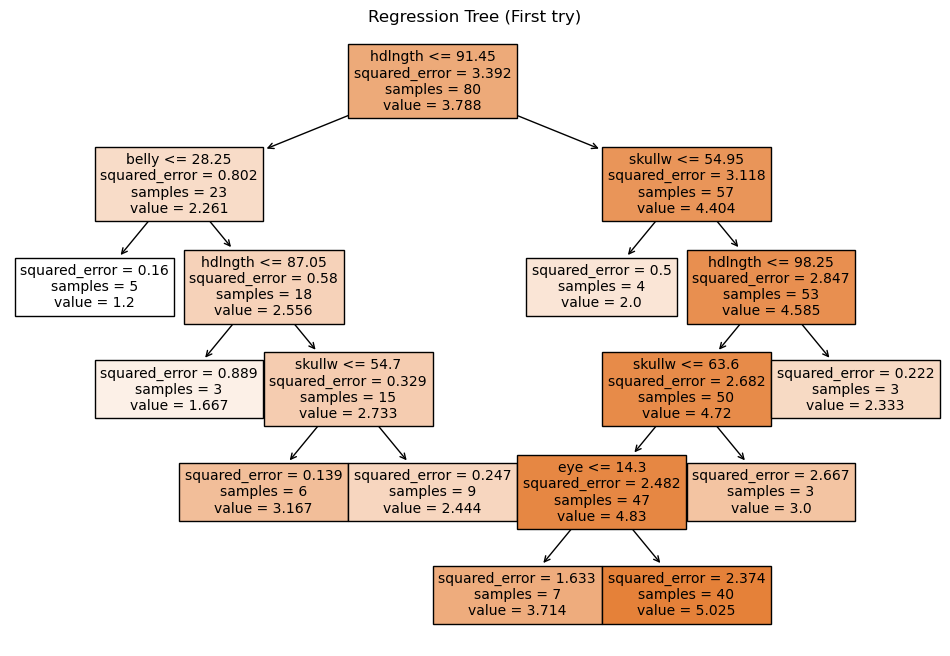

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize this regression tree
plt.figure(figsize=(12, 8))
plot_tree(reg_tree, feature_names=input_features, filled=True)
plt.title("Regression Tree (First try)")
plt.show()

**Task 3**

Grid search to find the best parameters

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the associated mean squared error
best_params = grid_search.best_params_
best_mse = grid_search.best_score_

print("Best Parameters:", best_params)
print("Mean Squared Error:", best_mse)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error: 0.07958644685115515


Visualize the tree

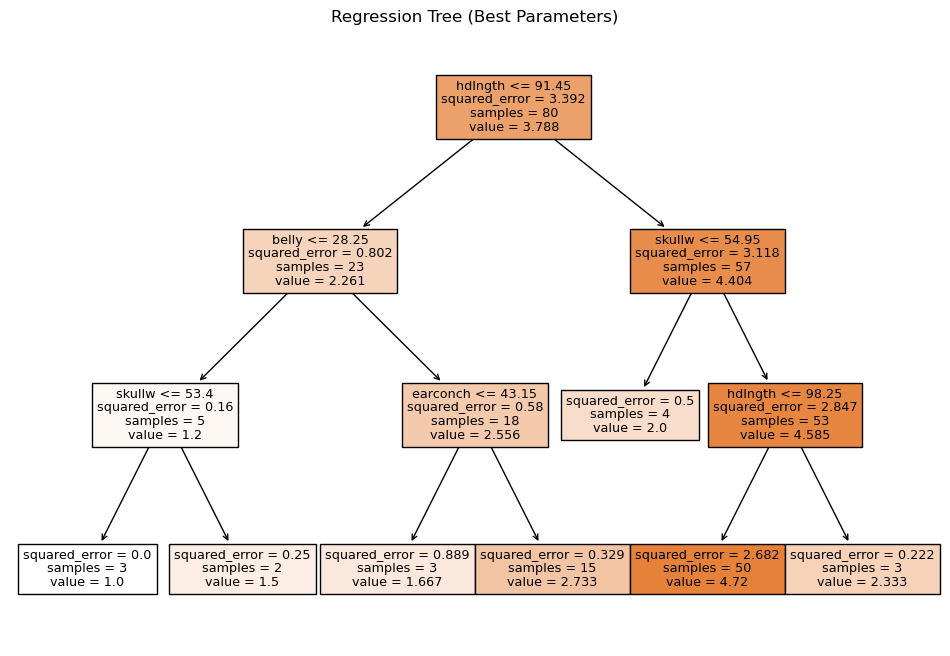

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the regression tree with best parameters
plt.figure(figsize=(12, 8))
plot_tree(grid_search.best_estimator_, feature_names=input_features, filled=True)
plt.title("Regression Tree (Best Parameters)")
plt.show()

## Please apply the following template to your Assignment 3:
```
def read_data_from_csv(path):
    """Load datasets from CSV files.
    Args:
        path (str): Path to the CSV file.
    Returns:
        X (np.ndarray): Features of samples.
        y (np.ndarray): Labels of samples, only provided in the public datasets.
    """
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[-1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'
    
    data = pd.read_csv(path)
    column_list = data.columns.values.tolist()
  
    if 'Label' in column_list:
        # for the public dataset, label column is provided.
        column_list.remove('Label')
        X = data[column_list].values
        y = data['Label'].astype('int').values
        return X, y
    else:
        # for the private dataset, label column is not provided.
        X = data[column_list].values
        return X
    
    
X_public, y_public = read_data_from_csv('assignment_3_public.csv')
print('Shape of X_public:', X_public.shape)  # n_sample, m_feature (590, 14)
print('Shape of y_public:', y_public.shape)  # n_sample (590,)

'''
CODE HERE!
'''

X_private = read_data_from_csv('assignment_3_private.csv')
print('Shape of X_private:', X_private.shape)  # k_sample, m_feature (100, 14)

import numpy as np

# remove and make your own predictions.
preds = np.full(len(X_private), -1, dtype=int)

'''
CODE HERE!
e.g.,
preds = np.full(len(X_private), -1, dtype=int)
'''

submission = pd.DataFrame({'Label': preds})
submission.to_csv('assignment_3.csv', index=True, index_label='Id')
```